# Decision Trees

Decision trees are a popular **supervised learning method** that can be used for **both regression and classification**. Decision trees are easy to use and understand and are often a good exploratory method for determing the influential features ina a dataset. 
#### How do they operate?
Basically, decision trees learn a series of explicit if then rules on feature values that result in a decision that predicts the target value. For simple example, 
![](https://cdn-images-1.medium.com/max/1600/1*9zQWztHG1z-gWjDyIydExQ.jpeg)

In [18]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Datasets

In [19]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

## Decision Trees on Iris Dataseta
The three species are called setosa, the versicolor and virginica. The data set has measurements for 150 flowers with 5 examples of each species. The classification task is to predict which of the three species and instances given these measurements.  The goal when building a decision tree is to find the sequence of questions that has the best accuracy at classifying the data in the fewest steps.

#### Information Gain from split 
If the split results in homogenous groups and completely separates the classes then the split is said to informative. So for the best split, the results should produce as homogeneous a set of classes as possible.

#### Mixed & Pure leaves
Trees whose leaf nodes each have all the same target value are called **pure**, as opposed to **mixed** where the leaf nodes are allowed to contain at least some mixture of the classes.

#### Decision Tree for Regression
Decision trees can also be used for regression using the same process of testing the future values at each node and predicting the target value based on the contents of the leafnode. For regression, the leafnode prediction would be the mean value of the target values for the training points in that leaf.

In [20]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


## Overfitting
Notice that the training data here is predicted perfectly with an accuracy of 1.0. While the test data is a little bit worse. This is an indication that the tree is likely **overfitting** and in fact this is a problem with building decision trees in general that keep adding rules until the leafnodes are pure. Typically such trees are overly complex and essentially memorized the training data. 

##### Preventing Overfitting
1. **Pre-pruning** : prevent the tree from becoming really detailed and complex by stopping its growth early. The decision tree implementation and scikit-learn only implements pre-pruning.
2. **Post-pruning/Pruning** : build a complete tree with pure leaves but then to prune back the tree into a simpler form.

##### Parameters to control pruning and overfitting
Tree complexity can be controlled via pruning by limiting either
* **maximum depth** of the tree using the `max_depth` parameter,
* **maximum number of leafnodes** using the `max_leaf_nodes` parameter, or
* We could also set a threshold on the **minimum number of instances** that must be in a node to consider splitting it using the `min_samples_leaf` parameter 

So in practice, adjusting only one of these trees is typically enough to control most overfitting. Although even with the most optimized parameter settings, individual decision trees will still tend to overfit. 

#### Setting max decision tree depth to help avoid overfitting

In [21]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


## Visualizing decision trees
1. The 1st line in a node indicates the **decision rule** being applied for that node. 
2. The 2nd line indicates the **total number of data instances** for that node.
3. The 3rd line shows the **class distribution** among those instances.
4. The 4th line shows the **majority class** of that nodes data instances. 

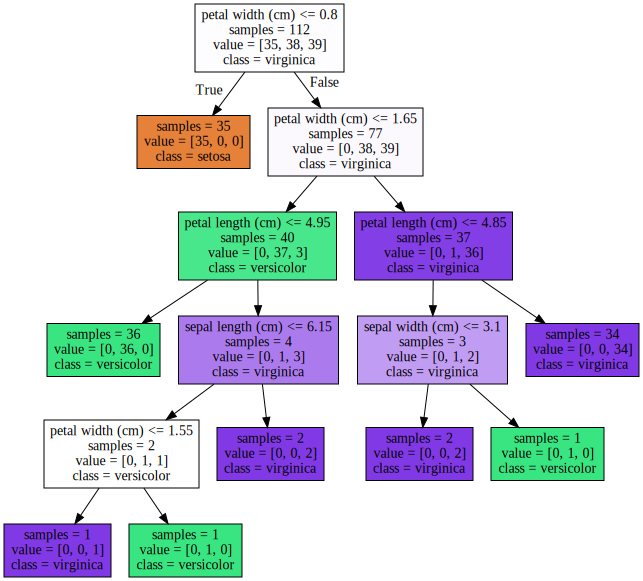

In [22]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)

#### Pre-pruned version (max_depth = 3)

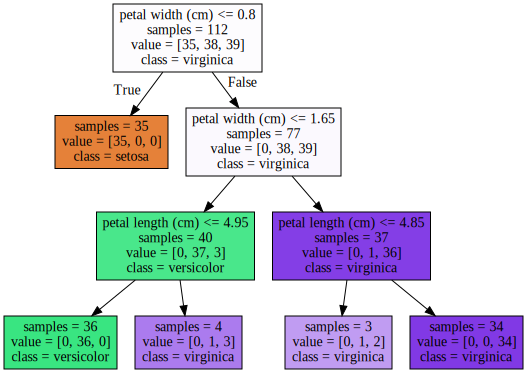

In [23]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

## Analysing Trees
1. Instead of trying to analyze all the paths in the tree it can be useful to see **which paths most of the data takes**. This can be done by looking for the largest samples values in the nodes. For example if we follow the largest samples values down this tree, we can see that a significant set of 35 virginica examples are classified perfectly when their petal length is greater than 5.05 centimeters. 
2. Another way of analyzing the tree instead of looking at the whole tree at once is to do what's called a feature importance calculation. This is one of the most useful and widely used types of summary analysis performed on a supervised learning model. 

#### Feature importance
* Feature importance is typically a number between 0 and 1 that's assigned to an individual feature.
* **It indicates how important that feature is to the overall prediction accuracy**. 
* feature importance of $0 \to$ feature is not used at all in the prediction. 
* feature importance of $1 \to$ feature perfectly predicts the target. 
* Typically, feature importance numbers are always positive and they're normalized so they sum to one. 

Note that if a feature has a low feature importance value, that doesn't necessarily mean that the feature is not important for prediction. It simply means that the particular feature wasn't chosen at an early level of the tree and this could be because the future may be identical or highly correlated with another informative feature and so doesn't provide any new additional signal for prediction. 

Feature importance values don't tell us which specific classes a feature might be especially predictive for, and they also don't indicate more complex relationships between features that may influence prediction.

<IPython.core.display.Javascript object>


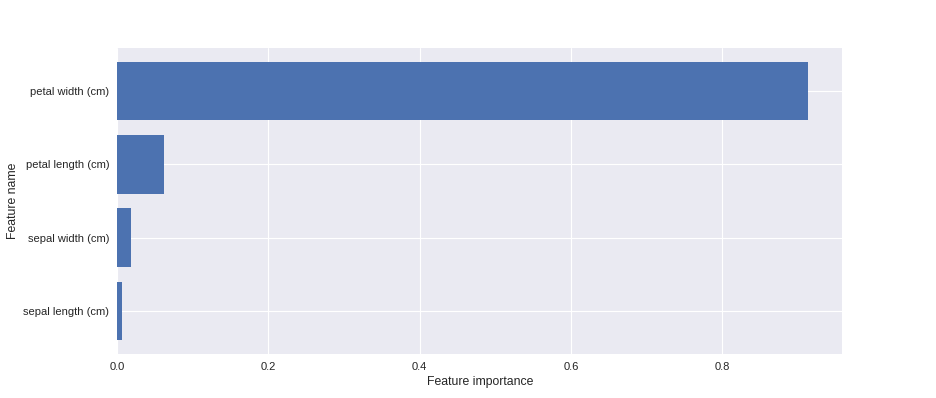

Feature importances: [ 0.00670338  0.01787567  0.06251049  0.91291047]


In [24]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

<IPython.core.display.Javascript object>


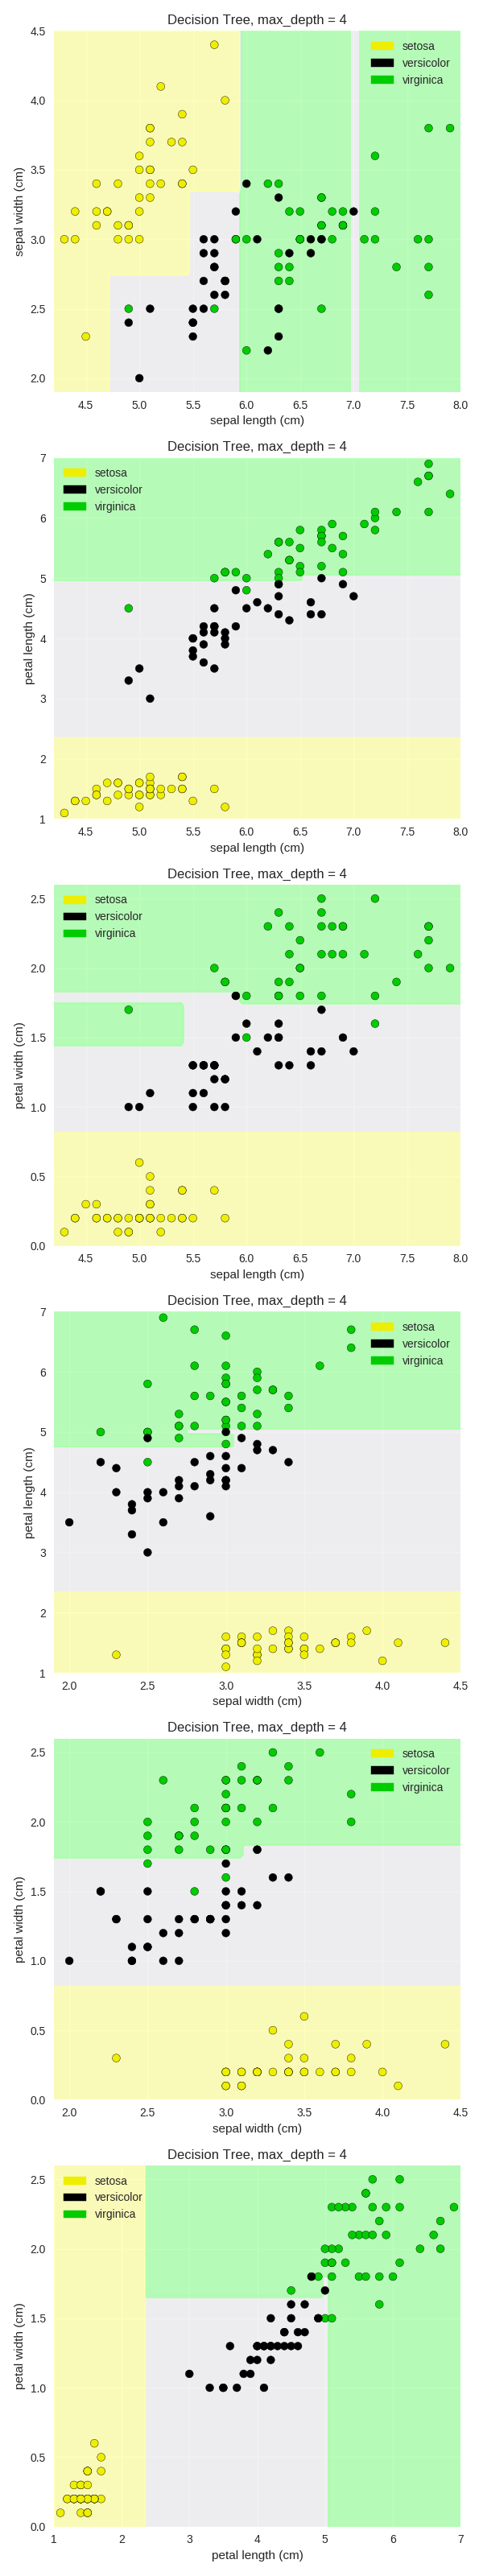

In [13]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

#### Decision Trees on a real-world dataset

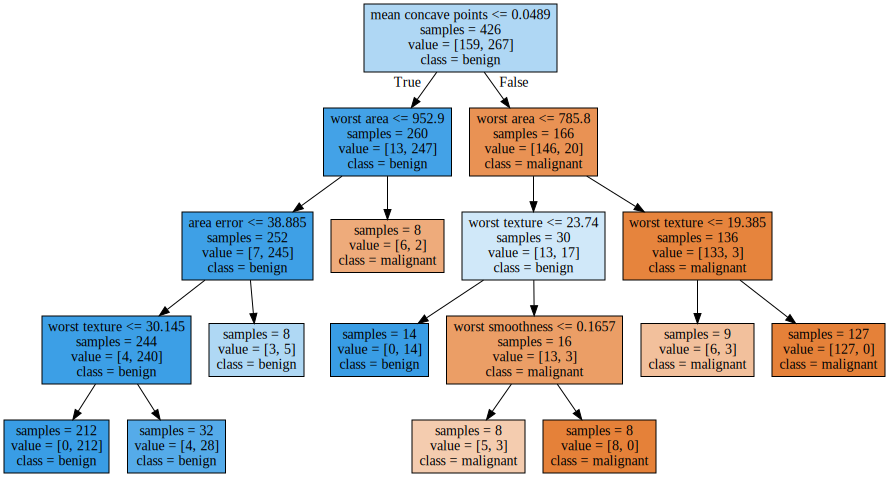

In [14]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94


<IPython.core.display.Javascript object>


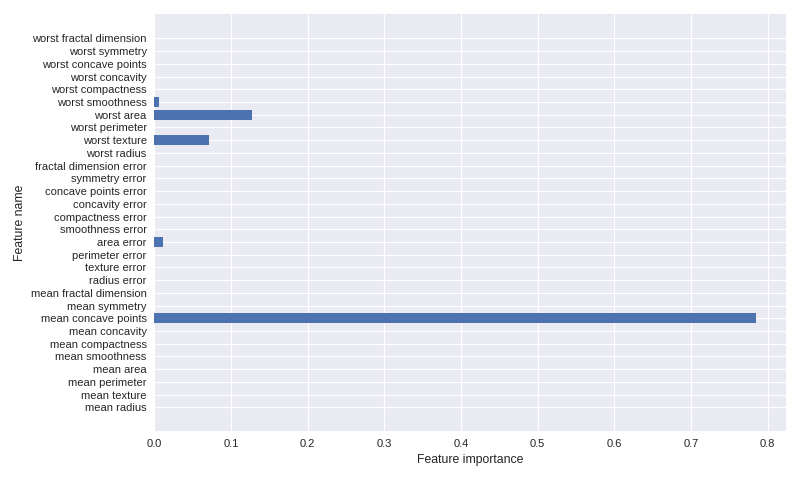

In [15]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()

## Pros of Decision Trees
1. Decision rules are easily visualized and interpreted by people including users without machine learning expertise. This makes decision trees a useful choice for getting an initial understanding of what some of the more important features are likely to be for a particular prediction task
2. **Doesn't require Normalization**: DTs can be used without having feature pre-processing or normalization. Since each feature is processed independently and the splitting of the data doesn't depend on the absolute scale of the feature. So decision trees tend to work well with data sets that have a mixture of feature types-- binary, categorical or continuous and with features that are on very different scales.

## Drawbacks
1. Despite the use of pruning they can still overfit all or parts of the data and may not achieve the best generalization performance compared to other methods. One way to overcome that problem is to create what's called an ensemble of decision trees which combines multiple decision trees to make a prediction and will look at ensembles of decision trees in the following lecture.